In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../pro-test/data/egypt_1_drop_non_impact_params.csv', index_col=0)
data.head(5)

,nameofevent,startdate,endate,governorate,district,disengcampas,location,gpslat,gpslong,locationtype,...,milrepress,beltegeyyarepress,residentsrepress,partyrepress,employerrepress,MBrepress,otherrepress,killed,injured,arrested
recordnumber,,,,,,,,,,,,,,,,,,,,,
201201004,NaN,12/31/2011,NaN,Alexandria,NaN,Muntazah,كنيسة القديسين,31.263166,29.992108,Church,...,1,0,0,0,0,0,0,0,0,0
201201003,NaN,12/31/2011,1/1/2012,Cairo,NaN,Qasr Al-Nile,"ميدان التحرير , من دار القضاء العالى , من قصر...",30.045024,31.235532,Midan,...,0,0,0,0,0,0,0,0,0,0
201201012,NaN,12/31/2011,1/22/2012,Cairo,NaN,Qasr Al-Nile,دار القضاء العالى,30.052627,31.240259,Government building,...,0,0,0,0,0,0,1,1,0,0
201201002,NaN,1/1/2012,NaN,Cairo,NaN,Al Azbakiyya,محطة قطار رمسيس,30.062994,31.246995,Infrastructure,...,0,0,0,0,0,0,0,0,0,0
201201009,NaN,1/1/2012,NaN,RedSea,NaN,Hurghada 1,مطار الغردقة,27.179844,33.809037,Infrastructure,...,0,0,0,0,0,0,0,0,0,0


In [10]:
%matplotlib inline
sns.set(rc={'figure.figsize':(12,6)})
def future_plot(column, drop_non_violence=False):
    ''' create a dataframe of 2 columns only'''
    df = data[[column,'repression']].reset_index().drop(columns='recordnumber')
    
    '''groupby the column'''
    grouped_df = pd.DataFrame(df.groupby(column)['repression'].value_counts().unstack())
    grouped_df = grouped_df.iloc[:, [3,6,4,5,0,2,1]]
    if drop_non_violence == True:
        non_violence = grouped_df.drop(columns='No known coercion, no security presence')
        return non_violence.plot(kind='bar');
    else:
        return grouped_df.plot(kind='bar');

<AxesSubplot:xlabel='governorate'>

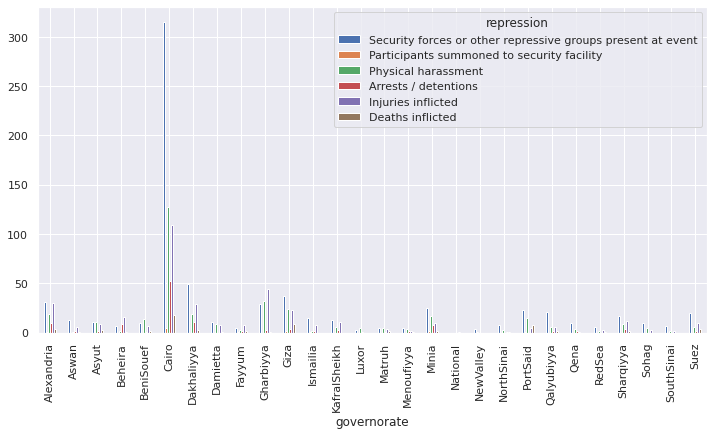

In [11]:
future_plot('governorate', drop_non_violence=True)
# plt.savefig('../plots/egypt_plots//gov_repress.png')

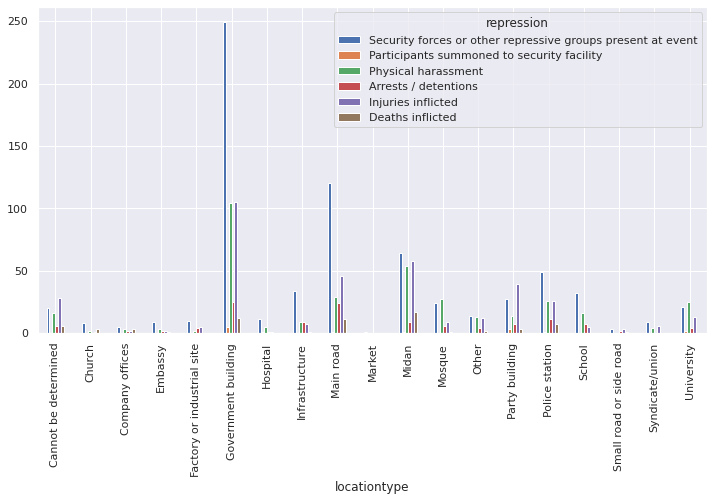

In [13]:
future_plot('locationtype', drop_non_violence=True)
plt.savefig('../plots/egypt_plots/location_repress.png')

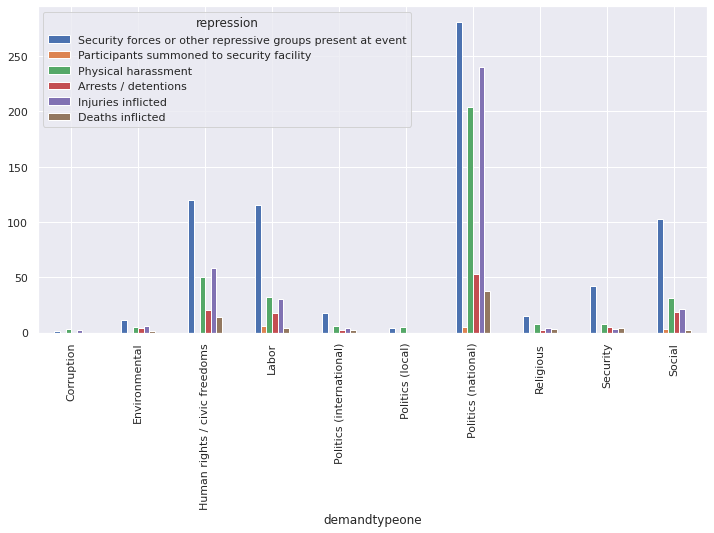

In [14]:
future_plot('demandtypeone', drop_non_violence=True)
plt.savefig('../plots/egypt_plots/demand_repress.png')

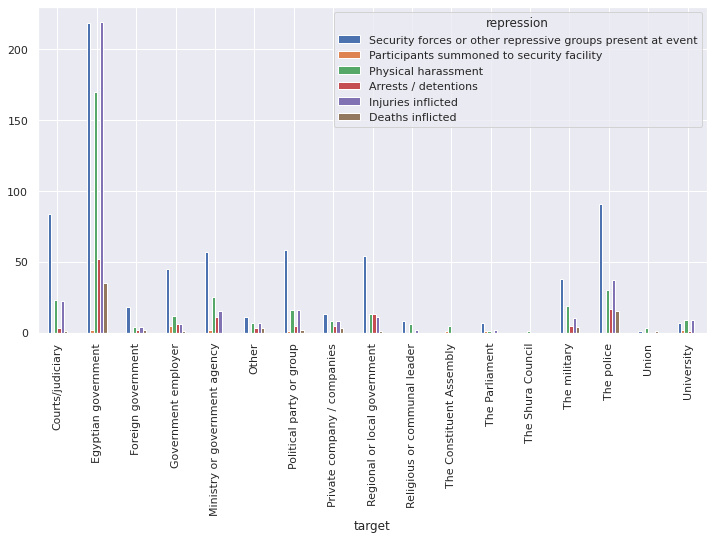

In [15]:
future_plot('target', drop_non_violence=True)
plt.savefig('../plots/egypt_plots/target_repress.png')

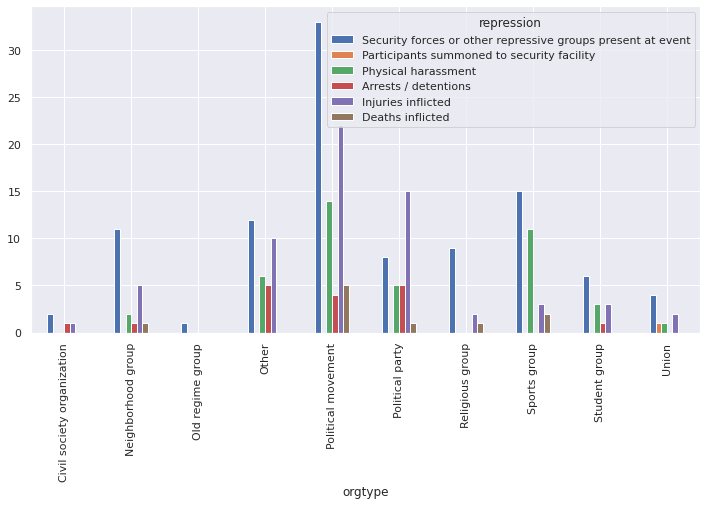

In [16]:
future_plot('orgtype', drop_non_violence=True)
plt.savefig('../plots/egypt_plots/orgtype_repress.png')

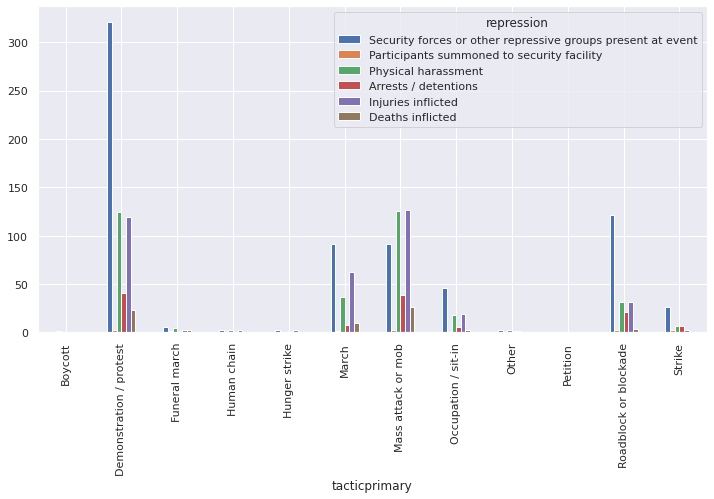

In [17]:
future_plot('tacticprimary', drop_non_violence=True)
plt.savefig('../plots/egypt_plots//tactic_repress.png')

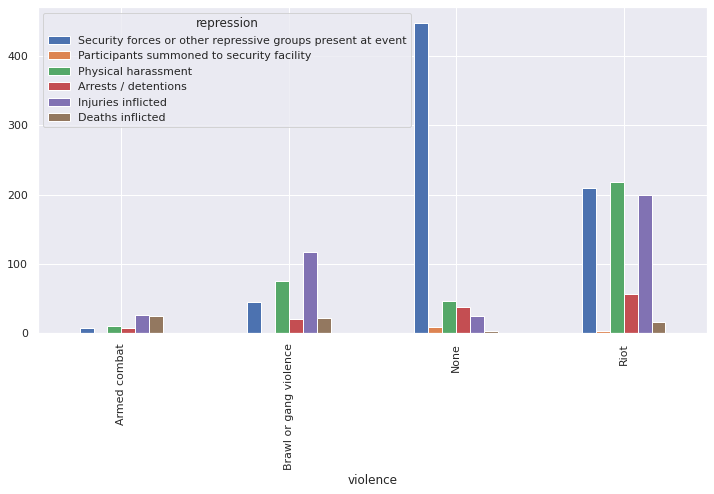

In [18]:
future_plot('violence', drop_non_violence=True)
plt.savefig('../plots/egypt_plots/violence_repress.png')